In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data and adding columns
df = pd.read_csv("dataset_Seminar1.txt", sep='\s+', header=None)
df.columns = [
    'Number_of_STAs', 'Load_Mbps', 'Size_x', 'Size_y', 'Area',
    'Contention_Window', 'Channel_Width_MHz', 'Packet_Size_bits',
    'Max_RSSI_dBm', 'Avg_RSSI_dBm', 'Min_RSSI_dBm',
    'Avg_Prob_Failure', 'Throughput_bps', 'Avg_Delay_s',
    'Total_Airtime', 'Proportional_Airtime'
]

display(df.head())

,Number_of_STAs,Load_Mbps,Size_x,Size_y,Area,Contention_Window,Channel_Width_MHz,Packet_Size_bits,Max_RSSI_dBm,Avg_RSSI_dBm,Min_RSSI_dBm,Avg_Prob_Failure,Throughput_bps,Avg_Delay_s,Total_Airtime,Proportional_Airtime
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687


In [2]:
# Displaying statistics about each feature (mean, standard deviation).
feature_stats = df.describe().loc[['mean', 'std']]
print("Feature Statistics (Mean and Standard Deviation):")
display(feature_stats.T)

Feature Statistics (Mean and Standard Deviation):


,mean,std
Number_of_STAs,2.144617e+01,1.155437e+01
Load_Mbps,2.140292e+07,1.852042e+07
Size_x,2.056294e+01,1.154521e+01
Size_y,2.047964e+01,1.154063e+01
Area,4.212704e+02,3.603443e+02
Contention_Window,2.270439e+02,3.233509e+02
Channel_Width_MHz,7.510600e+01,5.370428e+01
Packet_Size_bits,7.997580e+03,2.825533e+03
Max_RSSI_dBm,-4.591117e+01,5.400265e+00
Avg_RSSI_dBm,-5.757743e+01,6.108548e+00


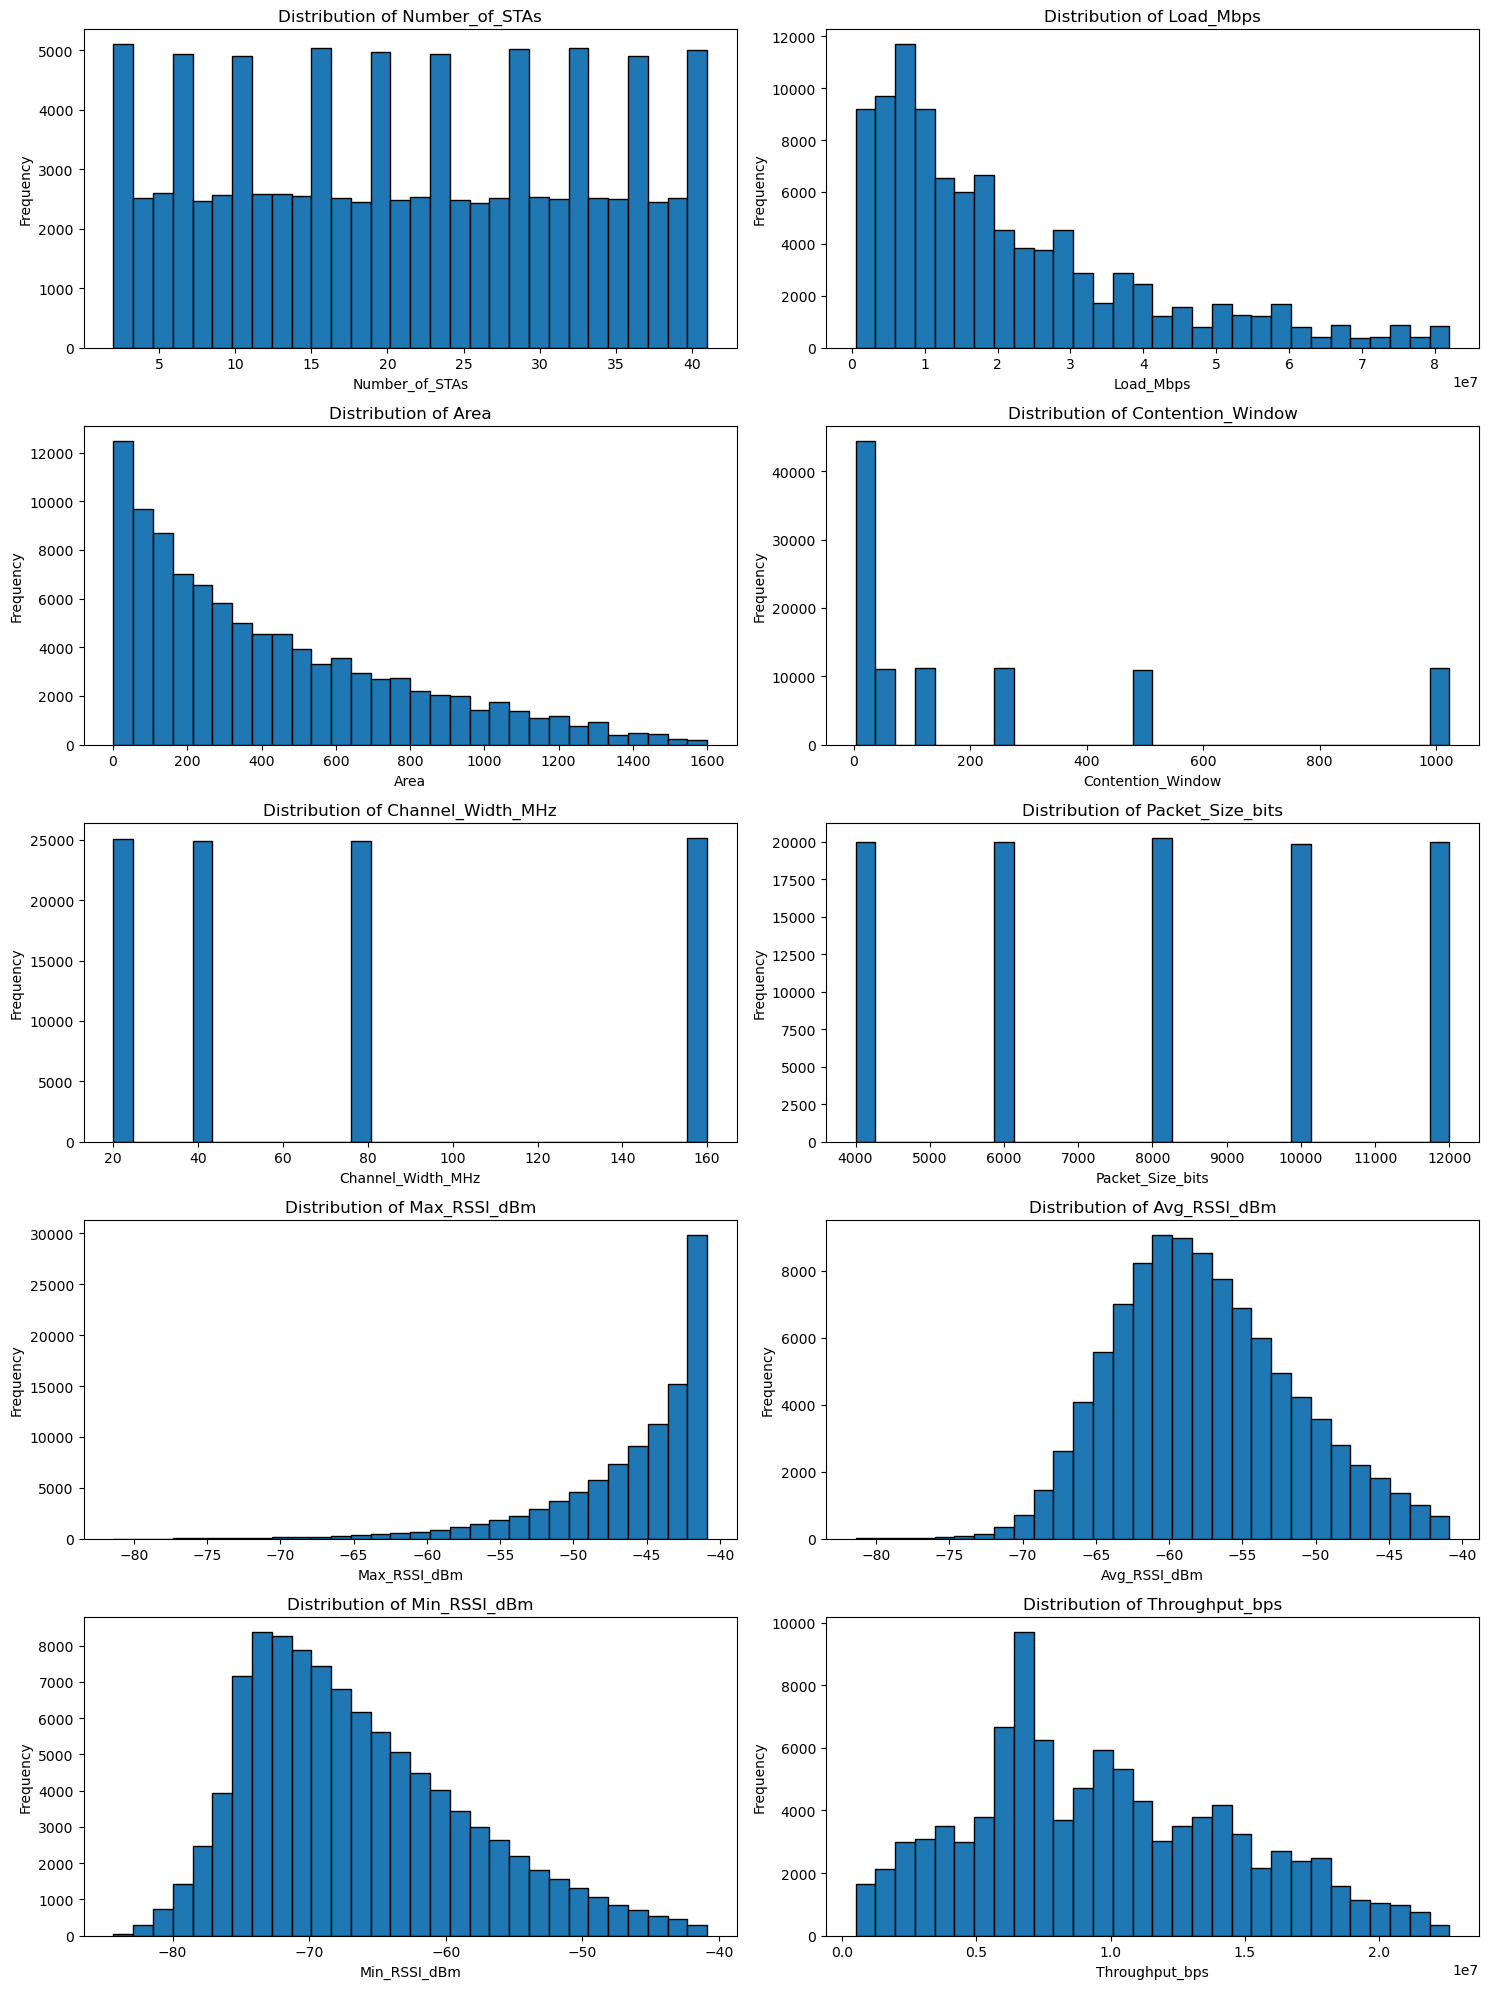

In [3]:
import matplotlib.pyplot as plt

# Features and target variables you want to plot
columns_to_plot = [
    'Number_of_STAs', 'Load_Mbps', 'Area', 'Contention_Window', 
    'Channel_Width_MHz', 'Packet_Size_bits', 'Max_RSSI_dBm', 
    'Avg_RSSI_dBm', 'Min_RSSI_dBm', 'Throughput_bps'
]


# Plot histograms for each feature
plt.figure(figsize=(15, 20))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()